In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
import collections
import numpy as np
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from sklearn.decomposition import PCA
import spacy
nlp = spacy.load('en_core_web_sm')
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from gensim import corpora, models, matutils
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb
from sklearn.cluster import KMeans
import scattertext as st

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/matthew.redmond@usfoods.com/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
df = pd.read_csv("Onion_NYT.csv")
df['Title'] = df['Title'].astype(str)
df['Content'] = df['Content'].astype(str)
df['spacy_Title'] = list(nlp.pipe(df['Title']))
df['spacy_Content'] = list(nlp.pipe(df['Content']))
spstopwords = nlp.Defaults.stop_words
#https://stackoverflow.com/questions/55817040/removing-stop-words-using-spacy
df['Spacy_Title2'] = df.Title.apply(lambda text: 
                                          " ".join(token.lemma_ for token in nlp(text) 
                                                   if not token.is_stop))
df['Spacy_Content2'] = df.Content.apply(lambda text: 
                                          " ".join(token.lemma_ for token in nlp(text) 
                                                   if not token.is_stop))
titlelistforcv = []
for doc in df.Spacy_Title2:
    titlelistforcv.append(doc)
contentlistforcv = []
for doc in df.Spacy_Content2:
    contentlistforcv.append(doc)

In [13]:
df

,Onion,Title,Published Time,Content,spacy_Title,spacy_Content,Spacy_Title2,Spacy_Content2
0,0,Misogyny Fuels Violence Against Women. Should ...,2021-03-26 00:31:15+00:00,"Caroline Criado Perez, author of “Invisible...","(Misogyny, Fuels, Violence, Against, Women, .,...","( , Caroline, Criado, Perez, ,, author, of, ...",Misogyny Fuels Violence Women . Hate Crime ?,"Caroline Criado Perez , author "" invisible..."
1,0,‘No Time to Be a Child’,2021-09-25 18:58:22+00:00,"A poem by Azariah Baker, a high school stude...","(‘, No, Time, to, Be, a, Child, ’)","( , A, poem, by, Azariah, Baker, ,, a, high, ...",' time child ',"poem Azariah Baker , high school student Ch..."
2,0,"His, Hers, Everyone’s: Gender-Equal Underwear ...",2021-06-25 21:18:24+00:00,"Abby Sugar, co-founder and chief executive o...","(His, ,, Hers, ,, Everyone, ’s, :, Gender, -, ...","( , Abby, Sugar, ,, co, -, founder, and, chie...",", , : Gender - Equal Underwear go ( slightly )...","Abby Sugar , co - founder chief executive P..."
3,0,A Fashion Show With an Unexpected Focus: Sexua...,2021-09-12 19:01:31+00:00,"Amanda Nguyen, founder of the civil rights o...","(A, Fashion, Show, With, an, Unexpected, Focus...","( , Amanda, Nguyen, ,, founder, of, the, civi...",Fashion Unexpected Focus : Sexual Assault surv...,"Amanda Nguyen , founder civil right organiz..."
4,0,"Hey, Alexa, Are You Sexist?",2021-02-12 21:20:20+00:00,Amazon’s Alexa,"(Hey, ,, Alexa, ,, Are, You, Sexist, ?)","( , Amazon, ’s, Alexa)","hey , Alexa , sexist ?",Amazon Alexa
...,...,...,...,...,...,...,...,...
43456,0,Swiss Voters Reject Proposal to Ban Synthetic ...,2021-06-13 14:19:25+00:00,ZURICH Voters in Switzerland on Sunday overw...,"(Swiss, Voters, Reject, Proposal, to, Ban, Syn...","(ZURICH, , Voters, in, Switzerland, on, Sund...",Swiss Voters Reject Proposal Ban Synthetic Pes...,ZURICH Voters Switzerland Sunday overwhelmi...
43457,0,Swiss Voters Approve Law Allowing Same-Sex Mar...,2021-09-26 14:54:38+00:00,ZURICH Voters in Switzerland overwhelmingly ...,"(Swiss, Voters, Approve, Law, Allowing, Same, ...","(ZURICH, , Voters, in, Switzerland, overwhel...",Swiss Voters Approve Law allow - sex marriage,ZURICH Voters Switzerland overwhelmingly de...
43458,0,A Nazi Legacy Haunts a Museum’s New Galleries,2021-10-11 18:19:53+00:00,ZURICH With the opening of an imposing exten...,"(A, Nazi, Legacy, Haunts, a, Museum, ’s, New, ...","(ZURICH, , With, the, opening, of, an, impos...",Nazi Legacy Haunts Museum New Galleries,ZURICH opening imposing extension Saturday ...
43459,1,Chemists Announce Upgraded Periodic Table With...,2019-10-23T08:00:00-05:00,ZURICH Offering fans a sneak peak of the servi...,"(Chemists, Announce, Upgraded, Periodic, Table...","(ZURICH, Offering, fans, a, sneak, peak, of, t...",chemist announce upgrade periodic table dozen ...,ZURICH Offering fan sneak peak service STEM co...


In [34]:
df['Onion'] = df['Onion'].astype(str)

In [35]:
corpus = st.CorpusFromPandas(df, category_col = 'Onion', text_col = 'Content', nlp = nlp).build()

In [33]:
corpus

In [36]:
html = st.produce_scattertext_explorer(corpus,
                   category = '1',
                   category_name= '1',
                   not_category_name = '0',                    
                   width_in_pixels=1000)


In [38]:
open("NTYO.html","wb").write(html.encode("utf-8"))

#open("StockMarketSentiment.html", "wb").write(html.encode("utf-8"))

25396130

In [3]:
cv = CountVectorizer()
X = cv.fit_transform(titlelistfit(X)orcv)
df2 = pd.DataFrame(X.toarray(),columns=cv.get_feature_names())
df2.columns

Index(['000', '00000000001', '00003', '000th', '004', '06', '08', '081', '10',
       '100',
       ...
       'zwirner', 'álvarez', 'élysées', 'émigré', 'éric', 'état', 'étoile',
       'óscar', 'özil', 'ünited'],
      dtype='object', length=26036)

In [4]:
cv = CountVectorizer()
X2 = cv.fit_transform(contentlistforcv)
df_cont = pd.DataFrame(X2.toarray(),columns=cv.get_feature_names())
df_cont.columns

Index(['00', '000', '0000', '00000000001', '0000000001', '00000029', '000001',
       '000002', '000017935', '00003',
       ...
       'ÿ2', '作者价值', '奈苗', '平台价值', '東京', '用户价值', '美苗', '长期', '閱讀繁體中文版',
       '阅读简体中文版'],
      dtype='object', length=57529)

In [5]:
num_clusters = 2
km = KMeans(n_clusters = num_clusters, random_state=10, n_init=1)
km.fit(X)

KMeans(n_clusters=2, n_init=1, random_state=10)

In [6]:
km2 = KMeans(n_clusters = num_clusters, random_state=10, n_init=1)
km2.fit(X2)

KMeans(n_clusters=2, n_init=1, random_state=10)

In [7]:
km.inertia_

279735.86588176293

In [9]:
print(X)
print(df2)

  (0, 5665)	1
  (0, 9426)	1
  (0, 10635)	1
  (0, 14940)	1
  (0, 24988)	1
  (0, 25666)	1
  (1, 4323)	1
  (1, 23496)	1
  (2, 7987)	1
  (2, 9673)	1
  (2, 9932)	1
  (2, 13971)	1
  (2, 21351)	1
  (2, 24325)	1
  (3, 1679)	1
  (3, 8565)	1
  (3, 9084)	1
  (3, 20725)	1
  (3, 22732)	1
  (3, 24363)	1
  (4, 1009)	1
  (4, 10881)	1
  (4, 20724)	1
  (5, 7501)	1
  (5, 7920)	1
  :	:
  (43457, 14213)	1
  (43457, 20721)	1
  (43457, 22849)	1
  (43457, 25084)	1
  (43458, 9536)	1
  (43458, 10651)	1
  (43458, 13286)	1
  (43458, 15400)	1
  (43458, 15583)	1
  (43458, 15705)	1
  (43459, 1296)	1
  (43459, 4271)	1
  (43459, 7232)	1
  (43459, 7646)	1
  (43459, 15145)	1
  (43459, 15705)	1
  (43459, 17140)	1
  (43459, 22920)	1
  (43459, 24609)	1
  (43460, 5954)	1
  (43460, 7953)	1
  (43460, 10560)	1
  (43460, 23203)	1
  (43460, 24747)	1
  (43460, 25533)	1
       000  00000000001  00003  000th  004  06  08  081  10  100  ...  \
0        0            0      0      0    0   0   0    0   0    0  ...   
1        0       

In [9]:
nmf2.transform(X2)

array([[0.01108508, 0.00114862],
       [0.00795222, 0.00312285],
       [0.00380441, 0.00226431],
       ...,
       [0.        , 0.08398911],
       [0.07187905, 0.16031695],
       [0.11368952, 0.        ]])

In [10]:
nmf_title_data = nmf.transform(X)
nmf_content_data = nmf2.transform(X2)
nmf_title_data = nmf_title_data.tolist()
nmf_content_data = nmf_content_data.tolist()

In [11]:
df_title_2 = pd.DataFrame(nmf_title_data, columns = ['feat1','feat2',])
df_content_2 = pd.DataFrame(nmf_content_data, columns = ['feat1','feat2',])

In [12]:
df4 = pd.merge(df, df_title_2, left_index=True, right_index=True)
df5 = pd.merge(df, df_content_2, left_index=True, right_index=True)

In [13]:
X = df4.iloc[:,8:10]
y = df4["Onion"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

In [16]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
result = rf_model.predict(X_test)
#Title NMF Random Forest
print(accuracy_score(y_test,result))
print(precision_score(y_test,result))
print(recall_score(y_test,result))
print(f1_score(y_test,result))

0.8151386172782699
0.28695652173913044
0.09355067328136074
0.14110101549973278


<AxesSubplot:>

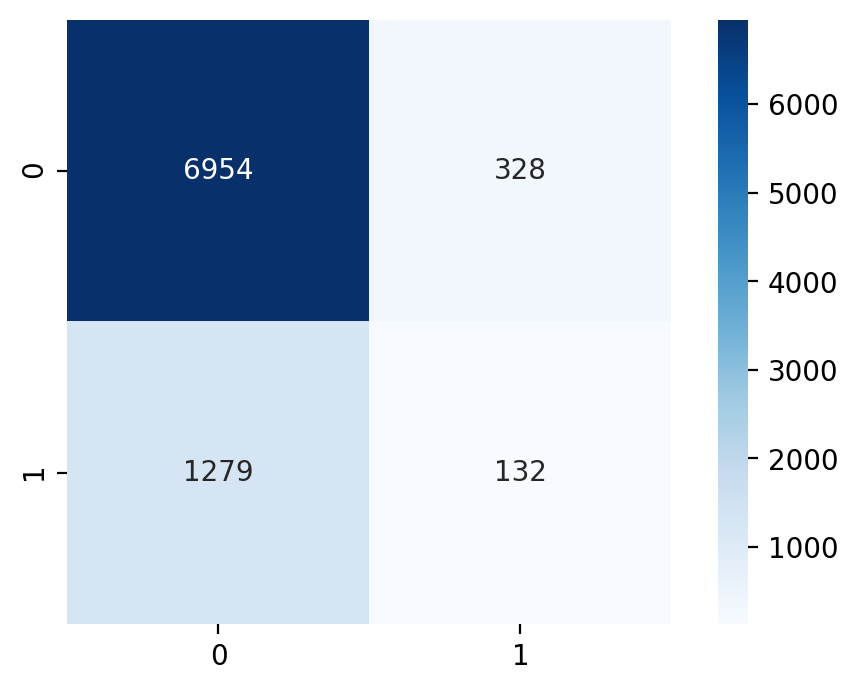

In [17]:
tc = confusion_matrix(y_test,result)
plt.figure(dpi=200)
sns.heatmap(tc, cmap=plt.cm.Blues, annot=True, square=True, fmt="d")

In [20]:
#boost (vanilla)
bc_model = xgb.XGBClassifier()
bc_model.fit(X_train, y_train)
result = bc_model.predict(X_test)
#Title NMF Boost
print(accuracy_score(y_test,result))
print(precision_score(y_test,result))
print(recall_score(y_test,result))
print(f1_score(y_test,result))

0.8383757045899
0.5340909090909091
0.03330970942593905
0.06270847231487658


<AxesSubplot:>

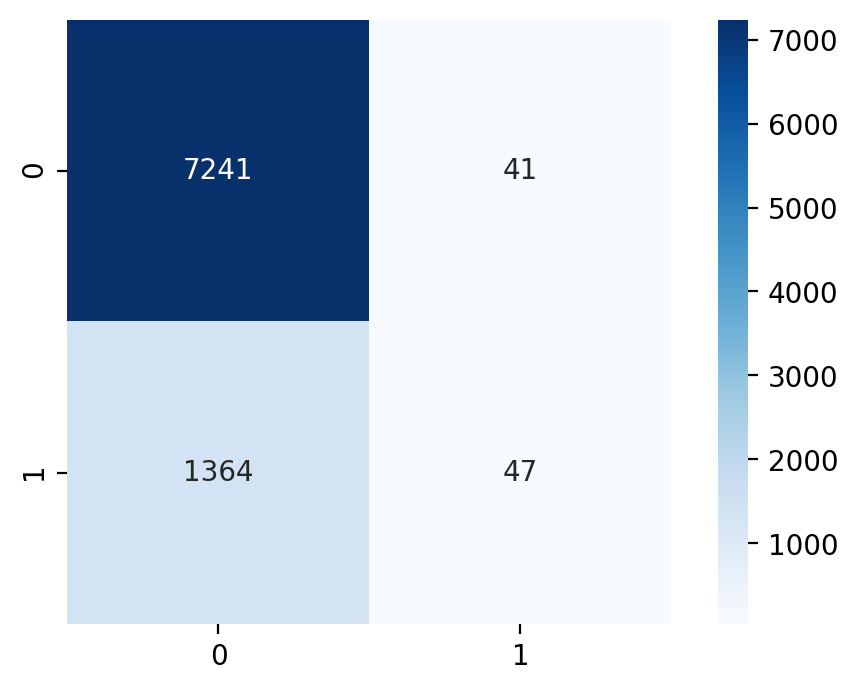

In [21]:
tc = confusion_matrix(y_test,result)
plt.figure(dpi=200)
sns.heatmap(tc, cmap=plt.cm.Blues, annot=True, square=True, fmt="d")

In [22]:
X = df5.iloc[:,8:10]
y = df5["Onion"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

In [24]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
result = rf_model.predict(X_test)
#Content NMF Random Forest
print(accuracy_score(y_test,result))
print(precision_score(y_test,result))
print(recall_score(y_test,result))
print(f1_score(y_test,result))

0.9628436673185321
0.8988269794721407
0.8688873139617292
0.8836036036036037


<AxesSubplot:>

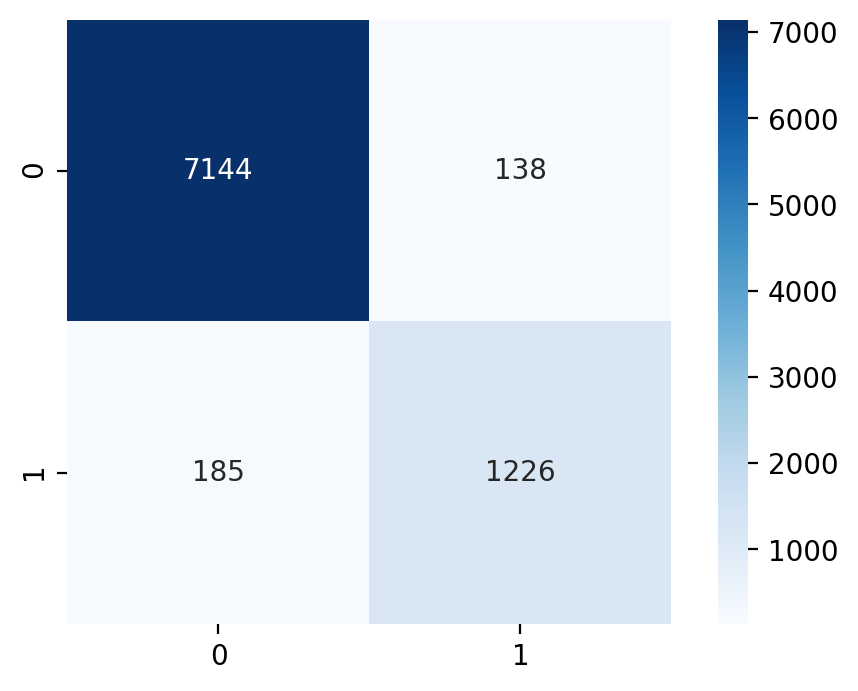

In [25]:
tc = confusion_matrix(y_test,result)
plt.figure(dpi=200)
sns.heatmap(tc, cmap=plt.cm.Blues, annot=True, square=True, fmt="d")

In [26]:
#boost (vanilla)
bc_model = xgb.XGBClassifier()
bc_model.fit(X_train, y_train)
result = bc_model.predict(X_test)
#Content NMF Boost
print(accuracy_score(y_test,result))
print(precision_score(y_test,result))
print(recall_score(y_test,result))
print(f1_score(y_test,result))

0.9700908777177039
0.9278810408921933
0.884479092841956
0.9056603773584905


<AxesSubplot:>

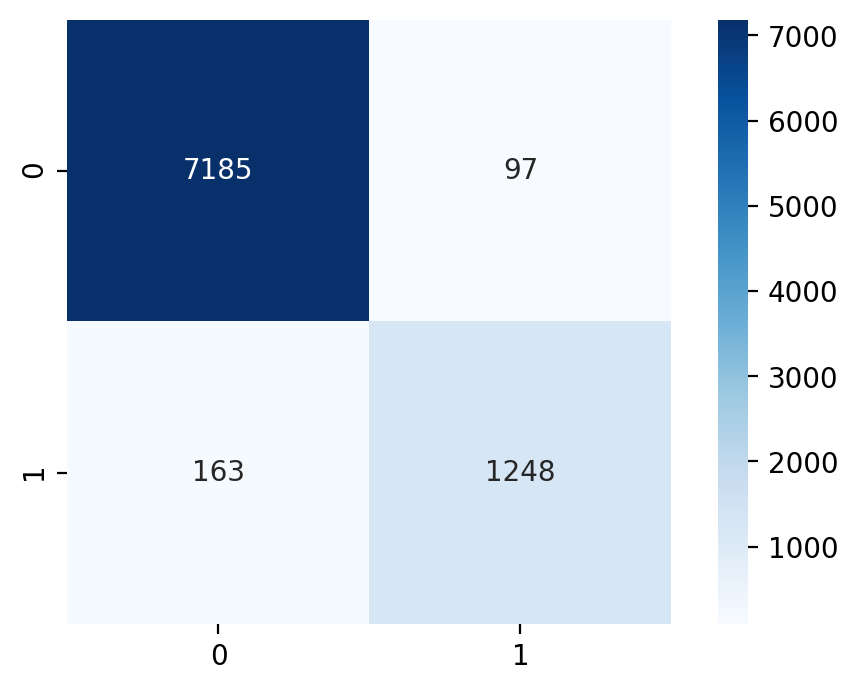

In [27]:
tc = confusion_matrix(y_test,result)
plt.figure(dpi=200)
sns.heatmap(tc, cmap=plt.cm.Blues, annot=True, square=True, fmt="d")